In [15]:
#importing packages for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# scipi is a library for statistical tests and visualizations 
from scipy import stats
# random enables us to generate random numbers
import random
import seaborn as sns
import statsmodels.api as sm
import warnings # For handling error messages.
from sklearn.model_selection import train_test_split

In [5]:
# importing data file
dat = pd.read_csv("C:\\Users\\jenny\\Desktop\\springboard\\capstone1\\eda\\users-data.csv")
print(dat.shape)
dat = dat.iloc[:,0:11]

#removing the repeat column
users_data = dat.dropna(axis=0)
print(users_data.shape)

(4732, 12)
(3676, 11)


In [6]:
#initial glances of the data set
print(users_data.info())#this looks good with 6 continuous parameters and four discrete types
print(users_data.describe())
print(users_data.groupby('weapon').describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 0 to 4731
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hits        3676 non-null   float64
 1   kills       3676 non-null   float64
 2   kdRatio     3676 non-null   float64
 3   headshots   3676 non-null   float64
 4   accuracy    3676 non-null   float64
 5   shots       3676 non-null   float64
 6   deaths      3676 non-null   float64
 7   weapon      3676 non-null   object 
 8   weapontype  3676 non-null   object 
 9   user        3676 non-null   object 
 10  gametype    3676 non-null   object 
dtypes: float64(7), object(4)
memory usage: 344.6+ KB
None
                hits          kills      kdRatio      headshots     accuracy  \
count    3676.000000    3676.000000  3676.000000    3676.000000  3676.000000   
mean     3573.318825    1213.893634     6.967901     308.325626     0.348285   
std      9567.459739    3909.738499   111.692783    2511.9120

In [ ]:
#making some initial plots
users_data.boxplot()#number of shots has some extreme values, may not be valuable for analysis
plt.xlabel('box plots of contiuous parameters')
plt.show()
#histogram of shots based on how the outliers are shown in the box plot
users_data.shots.hist(bins=20)
plt.xlabel('shots')
plt.ylabel('count of shots')

In [8]:
max_values = users_data.groupby('weapontype').max()
#looking the accuracy there some values that are over 1.0 which is not possible
print(max_values)

#remove rows where the accuracy is greater than 1.0
user_data_filtered = users_data[users_data['accuracy']<=1]#removed 35 rows

                          hits     kills      kdRatio  headshots   accuracy  \
weapontype                                                                    
weapon_assault_rifle  183185.0   42237.0  2937.000000     7465.0   0.687500   
weapon_launcher        10473.0    3000.0   303.333333      864.0  31.000000   
weapon_lmg            101962.0  132889.0  4938.000000   104777.0   0.675588   
weapon_marksman        13852.0   12173.0   902.000000     3758.0   0.964523   
weapon_melee             188.0    2944.0    18.000000        0.0  47.000000   
weapon_other              11.0    1037.0    21.166667        0.0  11.000000   
weapon_pistol           9768.0    6739.0   319.333333     1987.0   0.767898   
weapon_shotgun         24538.0   18988.0   176.000000     2209.0   1.135636   
weapon_smg            140802.0   90836.0  2258.000000    11661.0   0.639860   
weapon_sniper          88916.0  112351.0   779.000000   106398.0   1.131708   

                         shots   deaths            

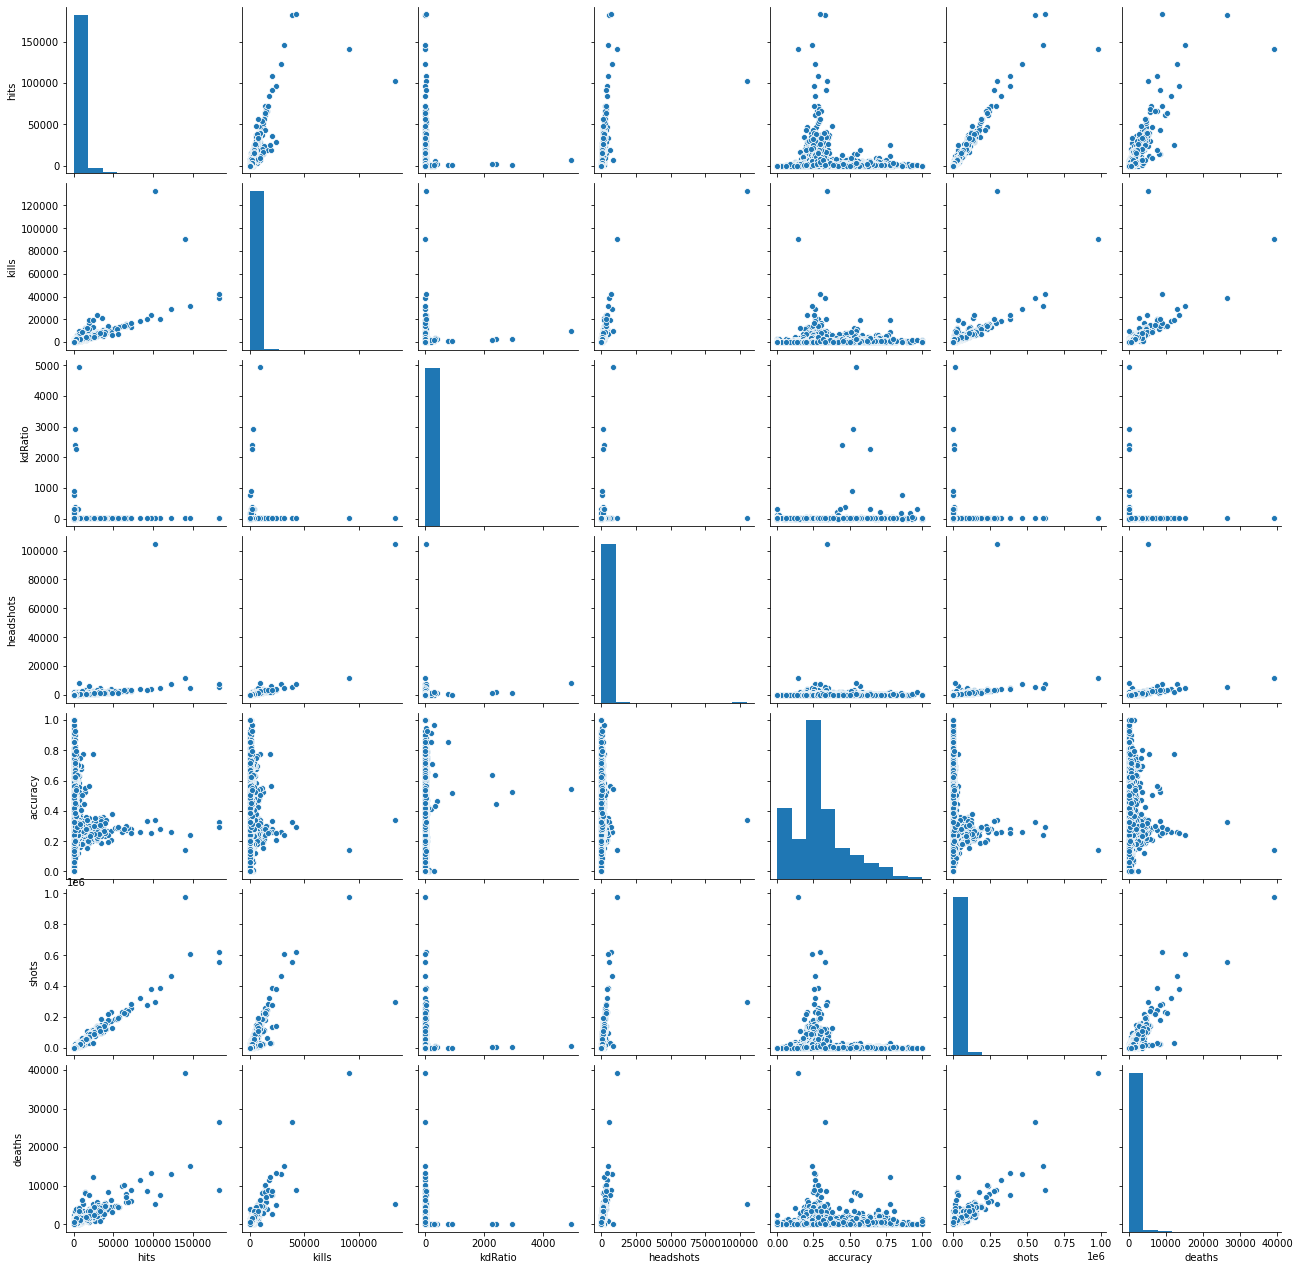

In [9]:
sns.pairplot(user_data_filtered)
#looking at this plot, accuracy seems to only be the parameter with a real distribution

In [10]:
#pearson correlation
user_data_filtered.corr()
#this shows what fundamentaly makes sense. For example, hits and shots are highly correlated. Kills correlates well with everything but KD and accuracy.

,hits,kills,kdRatio,headshots,accuracy,shots,deaths
hits,1.000000,0.779302,-0.001567,0.398896,0.014273,0.968559,0.850236
kills,0.779302,1.000000,0.041584,0.804051,0.068154,0.786057,0.764016
kdRatio,-0.001567,0.041584,1.000000,0.073815,0.066009,-0.008038,-0.020156
headshots,0.398896,0.804051,0.073815,1.000000,0.042338,0.358597,0.293970
accuracy,0.014273,0.068154,0.066009,0.042338,1.000000,-0.027038,0.085213
shots,0.968559,0.786057,-0.008038,0.358597,-0.027038,1.000000,0.882960
deaths,0.850236,0.764016,-0.020156,0.293970,0.085213,0.882960,1.000000


Text(0, 0.5, 'KD Ratio')

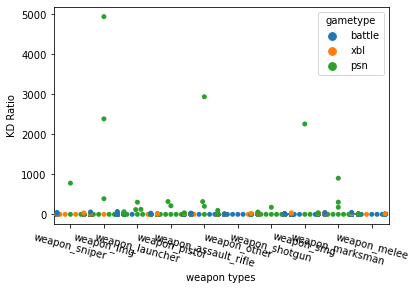

In [11]:
#making a swarmplot of the KD based on weapon types
sns.swarmplot(x='weapontype',y='kdRatio',data=user_data_filtered,hue='gametype')
plt.xticks(rotation=-15)
plt.xlabel('weapon types')
plt.ylabel('KD Ratio')

In [12]:
#setup the rankings so to determine possible relationships
user_data_filtered['ranking']=1
ranking = 1
for i in range(1,len(user_data_filtered)):
    if user_data_filtered.iloc[i,9]!=user_data_filtered.iloc[(i-1),9]:
        ranking =ranking+1
        user_data_filtered.iloc[i,11] = ranking
    else:
        user_data_filtered.iloc[i,11]=ranking

C:\Users\jenny\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jenny\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


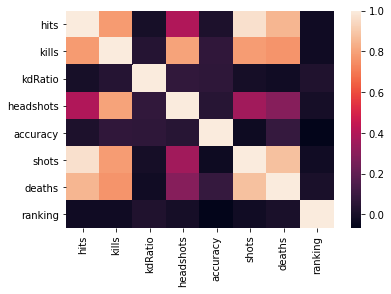

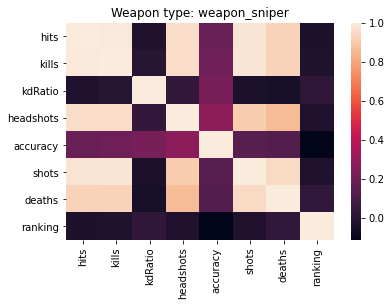

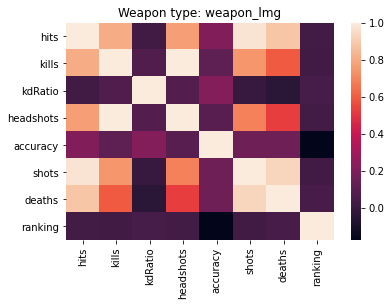

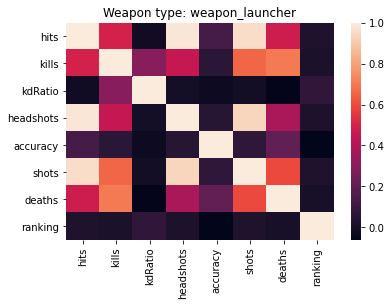

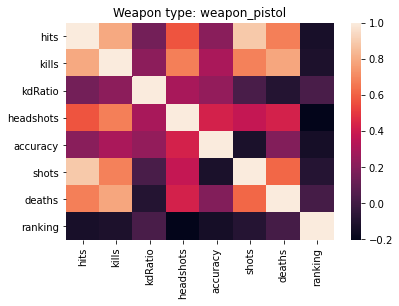

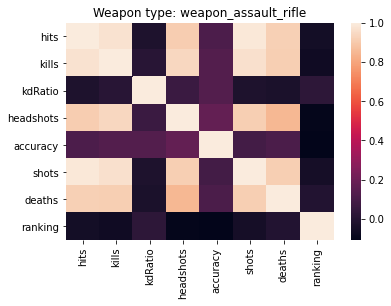

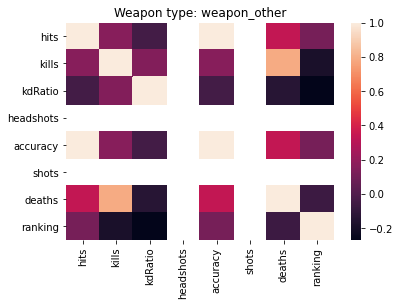

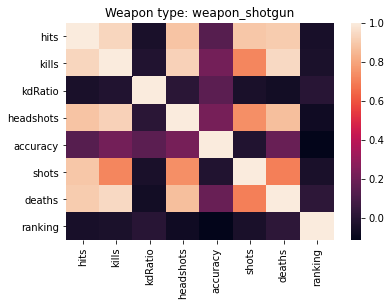

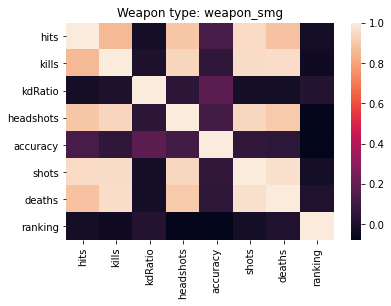

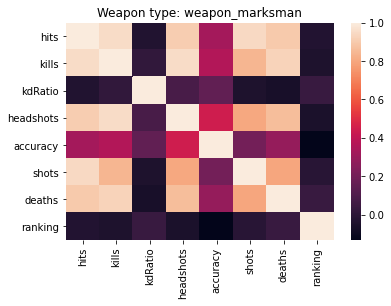

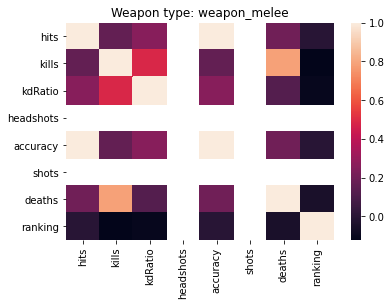

In [13]:
#heat map of variables with ranking
sns.heatmap(user_data_filtered.corr())
plt.show()

#heat map of variables based on weapon type
for i in user_data_filtered['weapontype'].unique():
    sns.heatmap(user_data_filtered.loc[user_data_filtered['weapontype']==i,:].corr())
    plt.title('Weapon type: '+i)
    plt.savefig('weapon-type-'+i+'.png')
    plt.show()

In [16]:
#linear regression on accuracy and ranking
X = user_data_filtered.loc[:,['accuracy','hits','kills','headshots','shots','deaths']]
X = sm.add_constant(X)
y = user_data_filtered.loc[:,'kdRatio']
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Create the model
ols_model = sm.OLS(y_train,X_train)
ols_model = ols_model.fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                kdRatio   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     6.251
Date:                Sun, 30 Aug 2020   Prob (F-statistic):           1.56e-06
Time:                        12:08:37   Log-Likelihood:                -16816.
No. Observations:                2730   AIC:                         3.365e+04
Df Residuals:                    2723   BIC:                         3.369e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1426      4.139     -0.518      0.605     -10.258       5.973
accuracy      40.2402     12.118      3.321      0.001      16.479      64.002
hits           0.0026      0.002      1.479      0.139      -0.001       0.006
kills       9.254e-05      0.003      0.027      0.979      -0.007       0.007
headshots      0.0040      0.004      0.958      0.338      -0.004       0.012
shots         -0.0005      0.000     -1.199      0.230      -0.001       0.000
deaths        -0.0104      0.005     -2.146      0.032      -0.020      -0.001
==============================================================================
Omnibus:                     7536.061   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        197758469.801
Skew:                          34.219   Prob(JB):                         0.00
Kurtosis:                    1319.758   Cond. No.                     2.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""